<a href="https://colab.research.google.com/github/TharangaLakmali/Flight_delay_prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd

In [2]:
# reading the pre processed final dataset
flight_data = pd.read_csv('/content/drive/MyDrive/data/final_dataset_cleaned_v1.csv', parse_dates=['FL_DATE'])

In [3]:
flight_data.shape

(12658696, 29)

In [4]:
flight_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,CANCELLED,DEP_HOUR,DEP_MIN,Aircraft type,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,target
0,2020,1,1,1,3,2020-01-01,N951WN,ONT,"Ontario, CA",SFO,"San Francisco, CA",1851,41.0,41.0,1.0,0.0,18,51,Boeing 737-7H4,2020-01-01 18:00:00,12.2,-7.3,25.0,0.0,330.0,18.4,1017.3,3.0,1
1,2020,1,1,1,3,2020-01-01,N467WN,ONT,"Ontario, CA",SFO,"San Francisco, CA",1146,-4.0,0.0,0.0,0.0,11,46,Boeing 737-7H4,2020-01-01 11:00:00,3.9,-3.4,59.0,0.0,210.0,5.4,1017.6,2.0,0
2,2020,1,1,1,3,2020-01-01,N7885A,ONT,"Ontario, CA",SJC,"San Jose, CA",2016,-4.0,0.0,0.0,0.0,20,16,Boeing 737-76N,2020-01-01 20:00:00,12.8,-7.3,24.0,0.0,290.0,11.2,1015.8,2.0,0
3,2020,1,1,1,3,2020-01-01,N551WN,ONT,"Ontario, CA",SJC,"San Jose, CA",1350,10.0,10.0,0.0,0.0,13,50,Boeing 737-76Q,2020-01-01 13:00:00,3.3,-4.0,59.0,0.0,0.0,0.0,1018.6,2.0,0
4,2020,1,1,1,3,2020-01-01,N968WN,ONT,"Ontario, CA",SJC,"San Jose, CA",916,1.0,1.0,0.0,0.0,9,16,Boeing 737-7H4,2020-01-01 09:00:00,4.4,-3.4,57.0,0.0,0.0,0.0,1016.9,1.0,0


In [5]:
flight_data.dtypes

YEAR                         int64
QUARTER                      int64
MONTH                        int64
DAY_OF_MONTH                 int64
DAY_OF_WEEK                  int64
FL_DATE             datetime64[ns]
TAIL_NUM                    object
ORIGIN                      object
ORIGIN_CITY_NAME            object
DEST                        object
DEST_CITY_NAME              object
DEP_TIME                     int64
DEP_DELAY                  float64
DEP_DELAY_NEW              float64
DEP_DEL15                  float64
CANCELLED                  float64
DEP_HOUR                     int64
DEP_MIN                      int64
Aircraft type               object
time                        object
temp                       float64
dwpt                       float64
rhum                       float64
prcp                       float64
wdir                       float64
wspd                       float64
pres                       float64
coco                       float64
target              

In [6]:
flight_data.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'CANCELLED',
       'DEP_HOUR', 'DEP_MIN', 'Aircraft type', 'time', 'temp', 'dwpt', 'rhum',
       'prcp', 'wdir', 'wspd', 'pres', 'coco', 'target'],
      dtype='object')

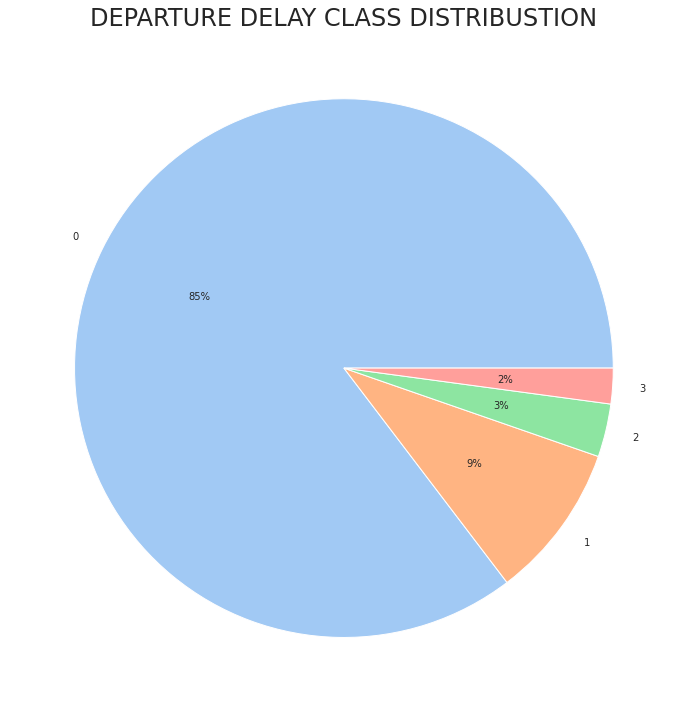

In [4]:
# DEPARTURE DELAY CLASS DISTRIBUSTION
target_counts = flight_data['target'].value_counts().rename_axis('Target_variable').reset_index(name='counts')
plt.figure(figsize=(20, 10))
colors = sns.color_palette('pastel')
plt.pie(target_counts['counts'], labels=target_counts['Target_variable'],colors = colors, autopct = '%0.0f%%')
plt.title('DEPARTURE DELAY CLASS DISTRIBUSTION', fontsize=24)
plt.tight_layout()
plt.show()

In [3]:
# Correlation matrix 

L_COLS = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_HOUR',
          'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'coco', 'DEP_DELAY']

corrM = flight_data[L_COLS].corr()
corrM

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_HOUR,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,DEP_DELAY
YEAR,1.000000,-0.084079,-0.083087,-0.005988,0.014486,-0.021833,-0.127998,-0.077478,0.072152,0.031826,-0.300098,-0.004305,0.105136,0.057500,-0.095035
QUARTER,-0.084079,1.000000,0.973169,0.024347,0.004220,-0.011760,0.200550,0.199293,-0.010138,-0.050368,-0.068329,-0.069783,-0.114279,-0.062479,-0.017818
MONTH,-0.083087,0.973169,1.000000,0.021416,0.009132,-0.011246,0.194424,0.187079,-0.021702,-0.048504,-0.069917,-0.061867,-0.099094,-0.062275,-0.017859
DAY_OF_MONTH,-0.005988,0.024347,0.021416,1.000000,0.002365,-0.001865,-0.005004,-0.003768,0.004428,-0.006851,-0.004958,0.005879,0.023837,-0.017013,-0.000046
DAY_OF_WEEK,0.014486,0.004220,0.009132,0.002365,1.000000,0.002765,-0.001457,0.003943,0.007659,0.014108,-0.046905,-0.000912,0.027379,0.014784,0.001551
DEP_HOUR,-0.021833,-0.011760,-0.011246,-0.001865,0.002765,1.000000,0.307374,-0.025285,-0.562061,0.016118,0.153485,0.420282,0.007282,0.082520,0.115415
temp,-0.127998,0.200550,0.194424,-0.005004,-0.001457,0.307374,1.000000,0.831686,-0.266601,-0.024395,0.052215,0.074619,-0.436176,0.167149,0.050974
dwpt,-0.077478,0.199293,0.187079,-0.003768,0.003943,-0.025285,0.831686,1.000000,0.304369,0.057824,-0.071639,-0.169336,-0.534099,0.265398,0.009997
rhum,0.072152,-0.010138,-0.021702,0.004428,0.007659,-0.562061,-0.266601,0.304369,1.000000,0.159852,-0.228271,-0.445146,-0.190528,0.174204,-0.067672
prcp,0.031826,-0.050368,-0.048504,-0.006851,0.014108,0.016118,-0.024395,0.057824,0.159852,1.000000,-0.044708,0.062542,-0.142782,0.254284,0.016144


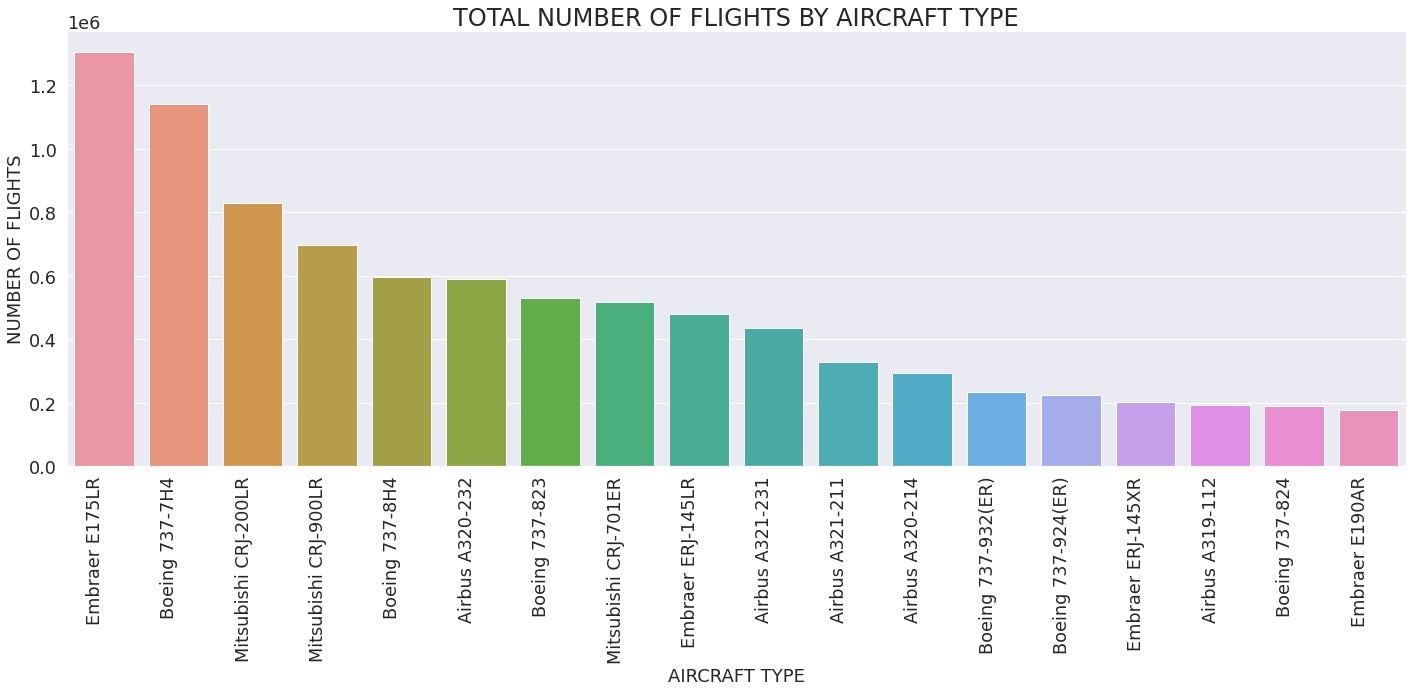

In [5]:
# Total number of flights by aricraft type
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=flight_data['Aircraft type'], data=flight_data, order=flight_data['Aircraft type'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRCRAFT TYPE', fontsize=24)
plt.xlabel('AIRCRAFT TYPE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

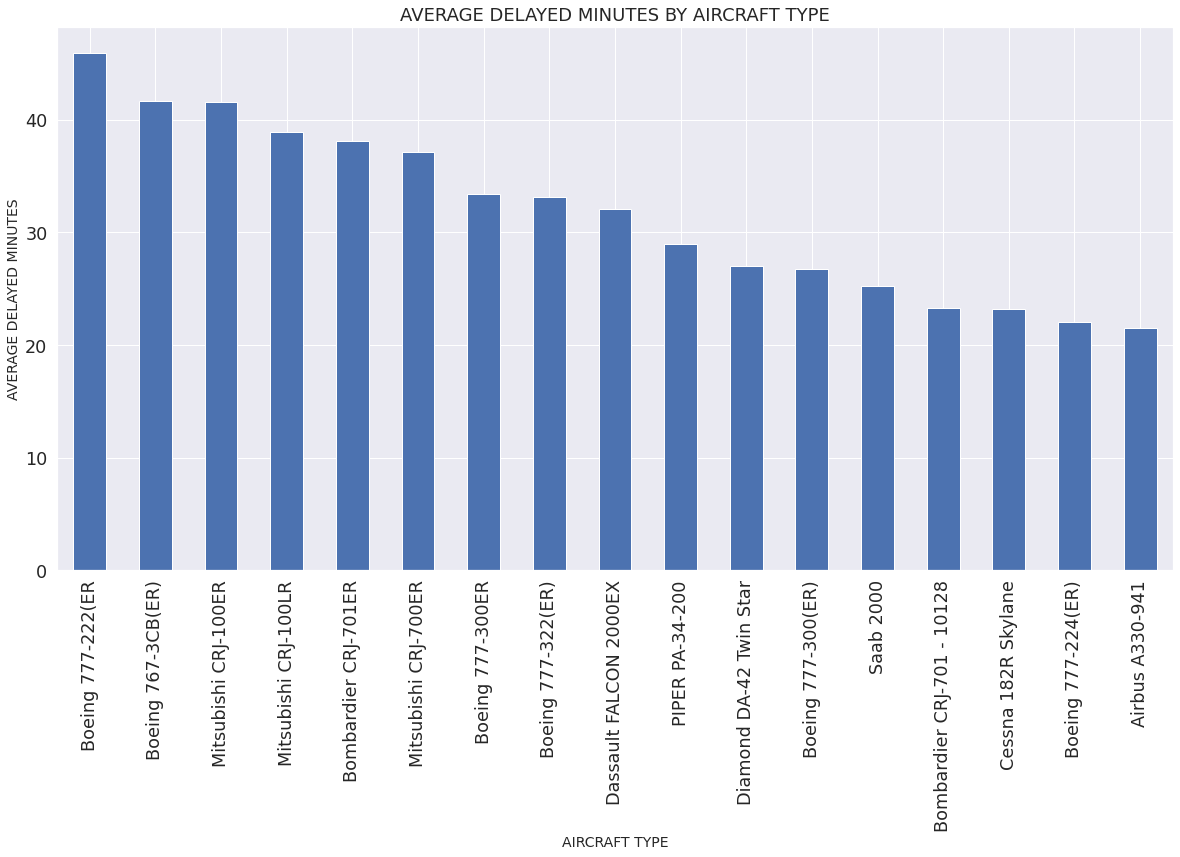

In [6]:
# Average delayed time by aircraft type
plt.figure(figsize=(20, 10))
flight_data.groupby('Aircraft type').DEP_DELAY.mean().sort_values(ascending=False).iloc[1:18].plot.bar()
plt.title('AVERAGE DELAYED MINUTES BY AIRCRAFT TYPE', fontsize=18)
plt.xlabel('AIRCRAFT TYPE', fontsize=14)
plt.ylabel('AVERAGE DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [18]:
# Delay class by aircraft
flight_data.groupby(['Aircraft type', 'target']).TAIL_NUM.count().reset_index()

,Aircraft type,target,TAIL_NUM
0,AIRCRAFTBoeing 767-332(ER),0,209
1,AIRCRAFTBoeing 767-332(ER),1,19
2,AIRCRAFTBoeing 767-332(ER),2,5
3,AIRCRAFTBoeing 767-332(ER),3,7
4,ATR 42-500,0,11723
...,...,...,...
805,Van's RV-8A,3,3
806,Boeing 767-432(ER),0,119
807,Boeing 767-432(ER),1,16
808,Boeing 767-432(ER),2,6


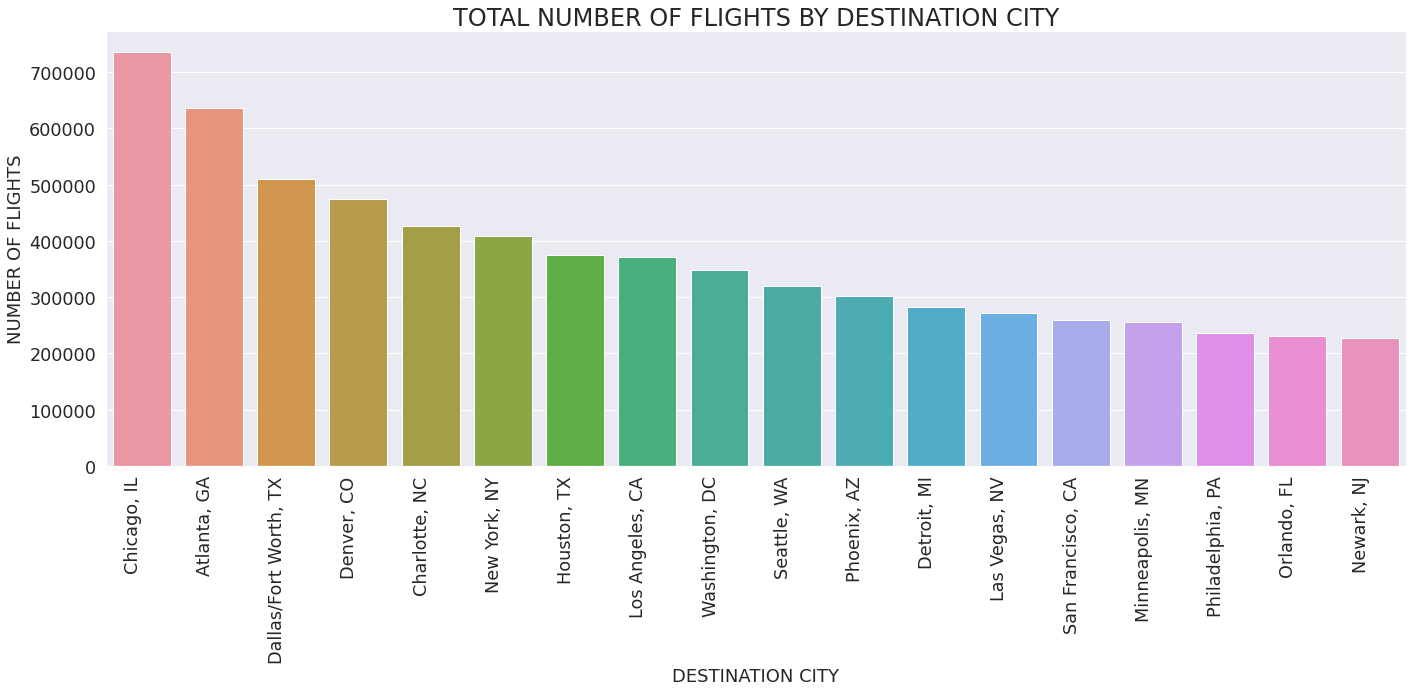

In [7]:
# Total number of flights by destination city
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=flight_data['DEST_CITY_NAME'], data=flight_data, order=flight_data['DEST_CITY_NAME'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY DESTINATION CITY', fontsize=24)
plt.xlabel('DESTINATION CITY', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

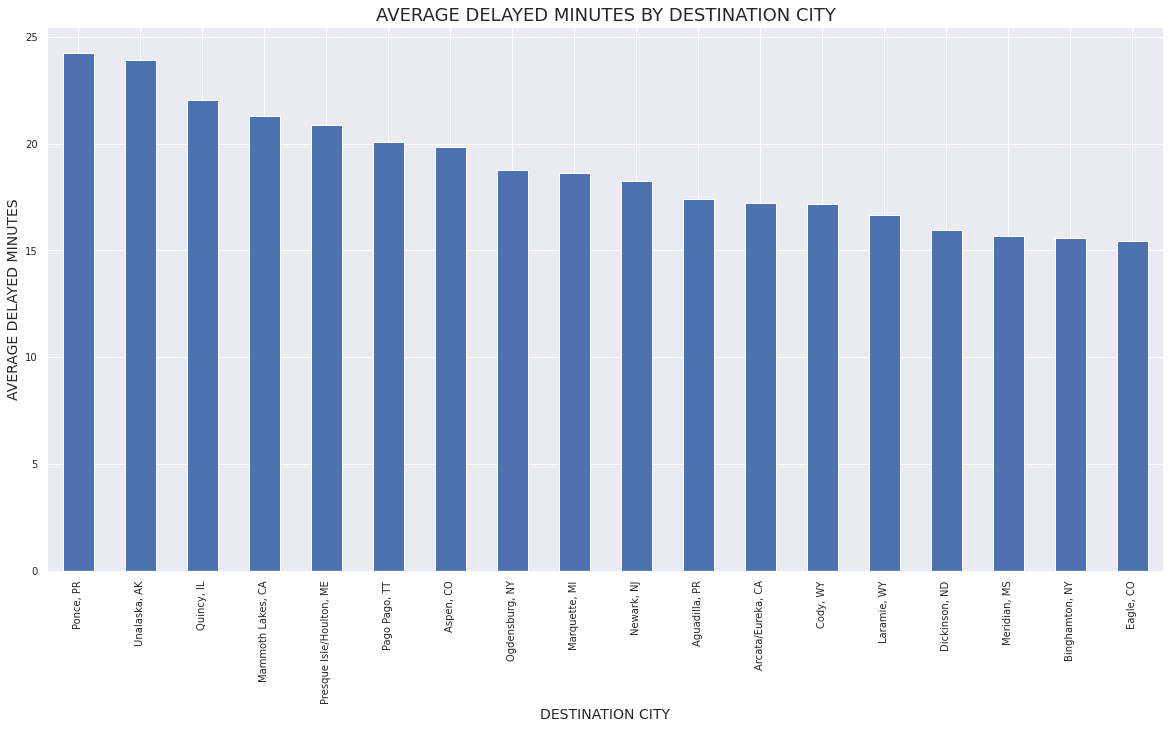

In [9]:
# Average delayed time by destination city
plt.figure(figsize=(20, 10))
flight_data.groupby('DEST_CITY_NAME').DEP_DELAY.mean().sort_values(ascending=False).iloc[0:18].plot.bar()
plt.title('AVERAGE DELAYED MINUTES BY DESTINATION CITY', fontsize=18)
plt.xlabel('DESTINATION CITY', fontsize=14)
plt.ylabel('AVERAGE DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

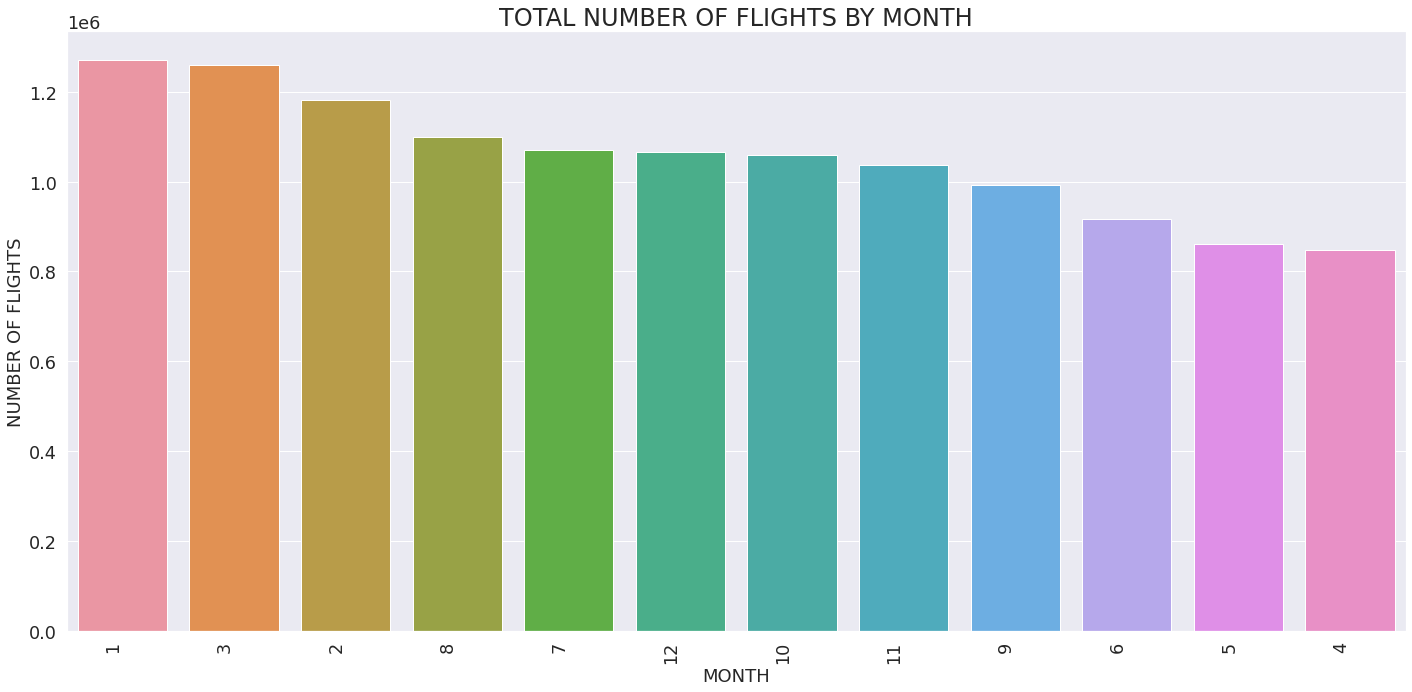

In [10]:
# Total number of flights by month
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=flight_data['MONTH'], data=flight_data, order=flight_data['MONTH'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY MONTH', fontsize=24)
plt.xlabel('MONTH', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

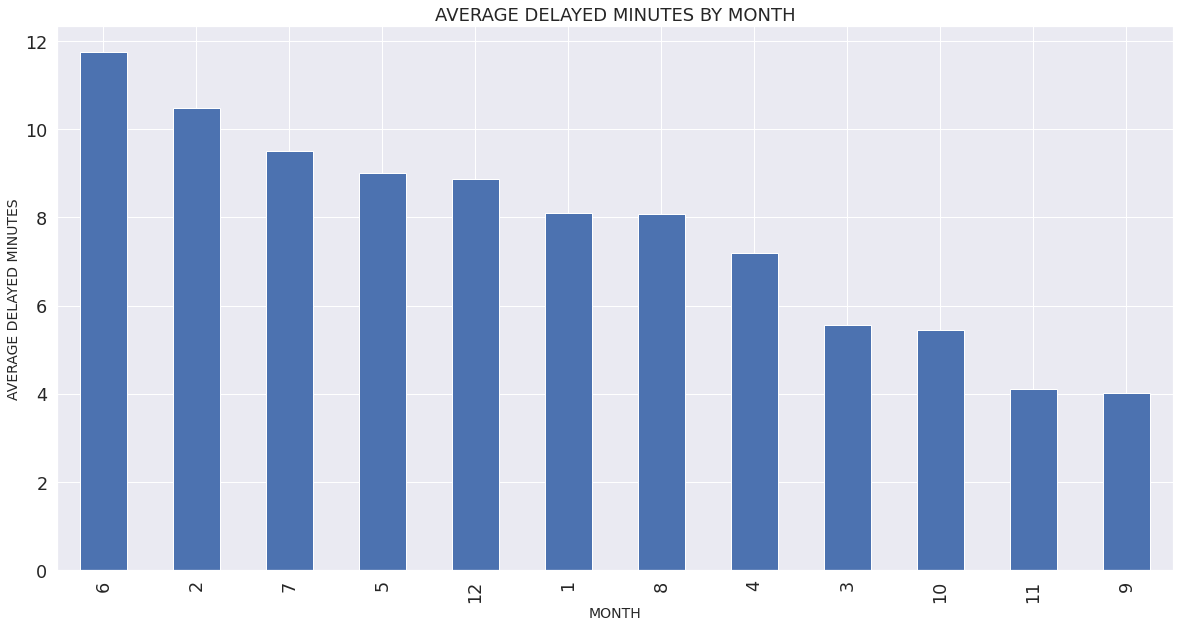

In [11]:
# Average delayed time by month
plt.figure(figsize=(20, 10))
flight_data.groupby('MONTH').DEP_DELAY.mean().sort_values(ascending=False).iloc[0:18].plot.bar()
plt.title('AVERAGE DELAYED MINUTES BY MONTH', fontsize=18)
plt.xlabel('MONTH', fontsize=14)
plt.ylabel('AVERAGE DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

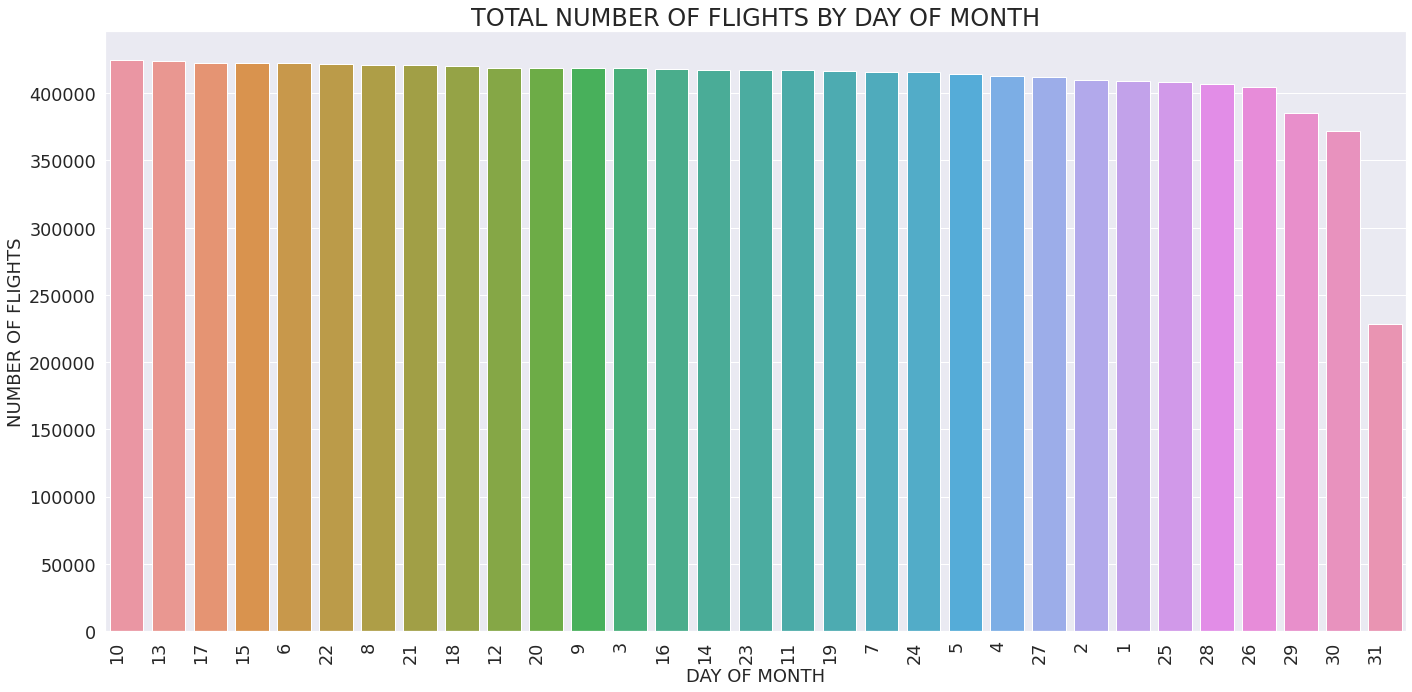

In [12]:
# Total number of flights by day of month
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=flight_data['DAY_OF_MONTH'], data=flight_data, order=flight_data['DAY_OF_MONTH'].value_counts().iloc[0:31].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY DAY OF MONTH', fontsize=24)
plt.xlabel('DAY OF MONTH', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

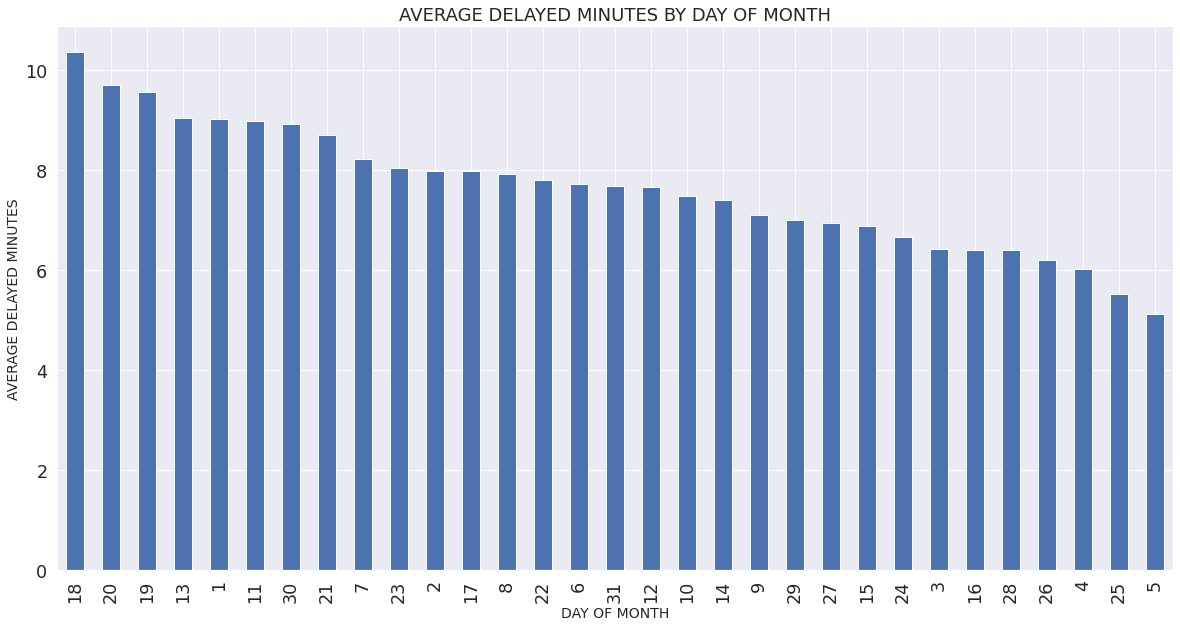

In [13]:
# Average delayed time by day of the month
plt.figure(figsize=(20, 10))
flight_data.groupby('DAY_OF_MONTH').DEP_DELAY.mean().sort_values(ascending=False).iloc[0:31].plot.bar()
plt.title('AVERAGE DELAYED MINUTES BY DAY OF MONTH', fontsize=18)
plt.xlabel('DAY OF MONTH', fontsize=14)
plt.ylabel('AVERAGE DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

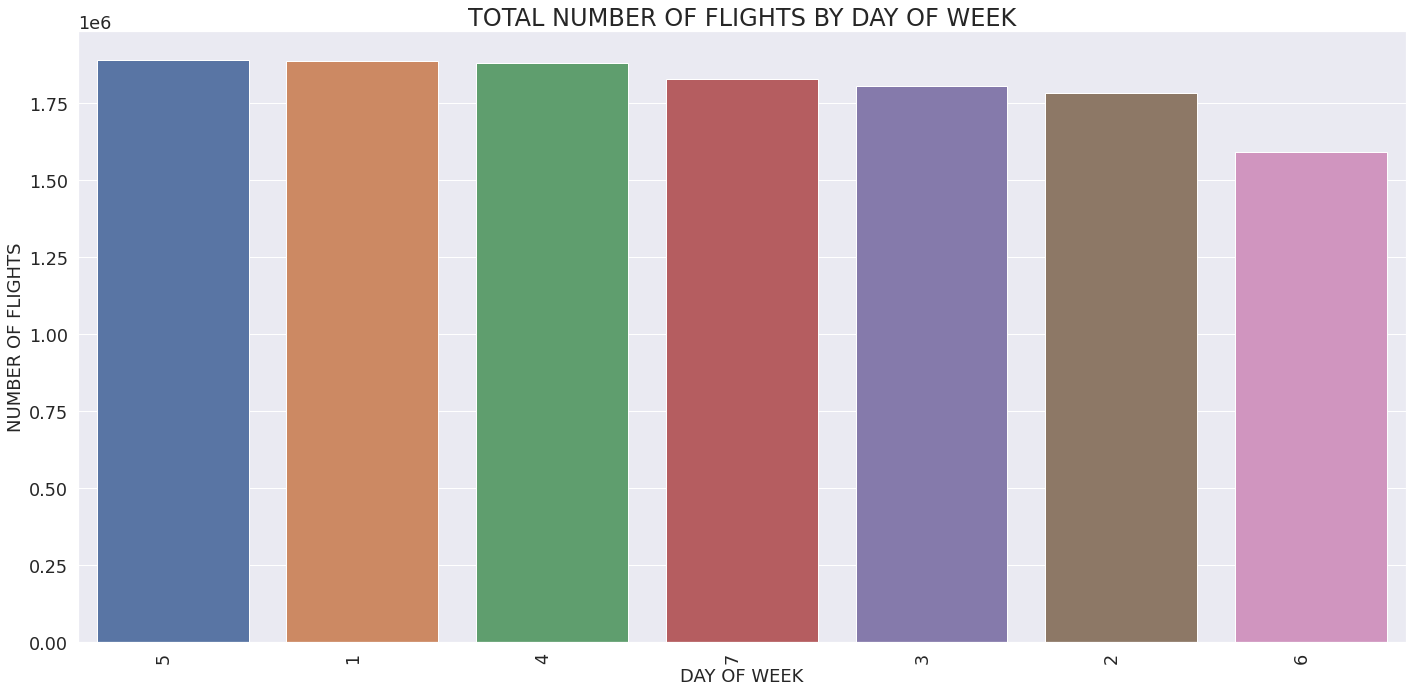

In [14]:
# Total number of flights by day of week
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=flight_data['DAY_OF_WEEK'], data=flight_data, order=flight_data['DAY_OF_WEEK'].value_counts().iloc[0:31].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY DAY OF WEEK', fontsize=24)
plt.xlabel('DAY OF WEEK', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

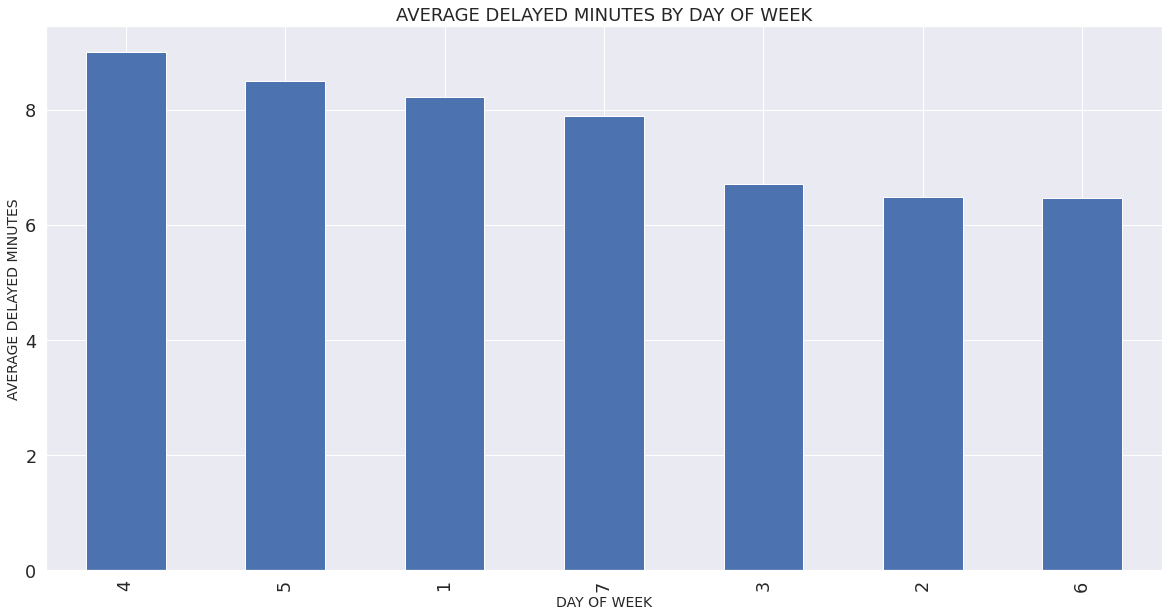

In [15]:
# Average delayed time by day of the week
plt.figure(figsize=(20, 10))
flight_data.groupby('DAY_OF_WEEK').DEP_DELAY.mean().sort_values(ascending=False).iloc[0:31].plot.bar()
plt.title('AVERAGE DELAYED MINUTES BY DAY OF WEEK', fontsize=18)
plt.xlabel('DAY OF WEEK', fontsize=14)
plt.ylabel('AVERAGE DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x720 with 0 Axes>

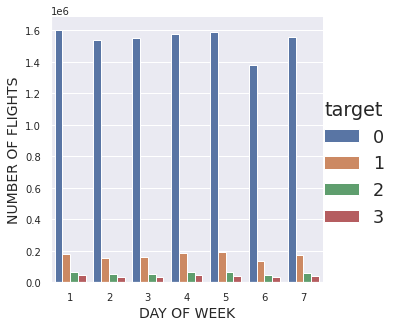

In [43]:
# DELAY CLASS BY DAY OF WEEK
day_of_week_df = flight_data.groupby(['DAY_OF_WEEK', 'target']).TAIL_NUM.count().reset_index()

plt.figure(figsize=(20, 10))
axis = sns.factorplot(x='DAY_OF_WEEK', y='TAIL_NUM', hue='target', data=day_of_week_df, kind='bar')
plt.xlabel('DAY OF WEEK', fontsize=14)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()